# Applying the CRISP-DM Method to a Business Problem

CRISP-DM stands for cross-industry process for data mining. It provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.

This model is an idealised sequence of events. In practice many of the tasks can be performed in a different order and it will often be necessary to backtrack to previous tasks and repeat certain actions.


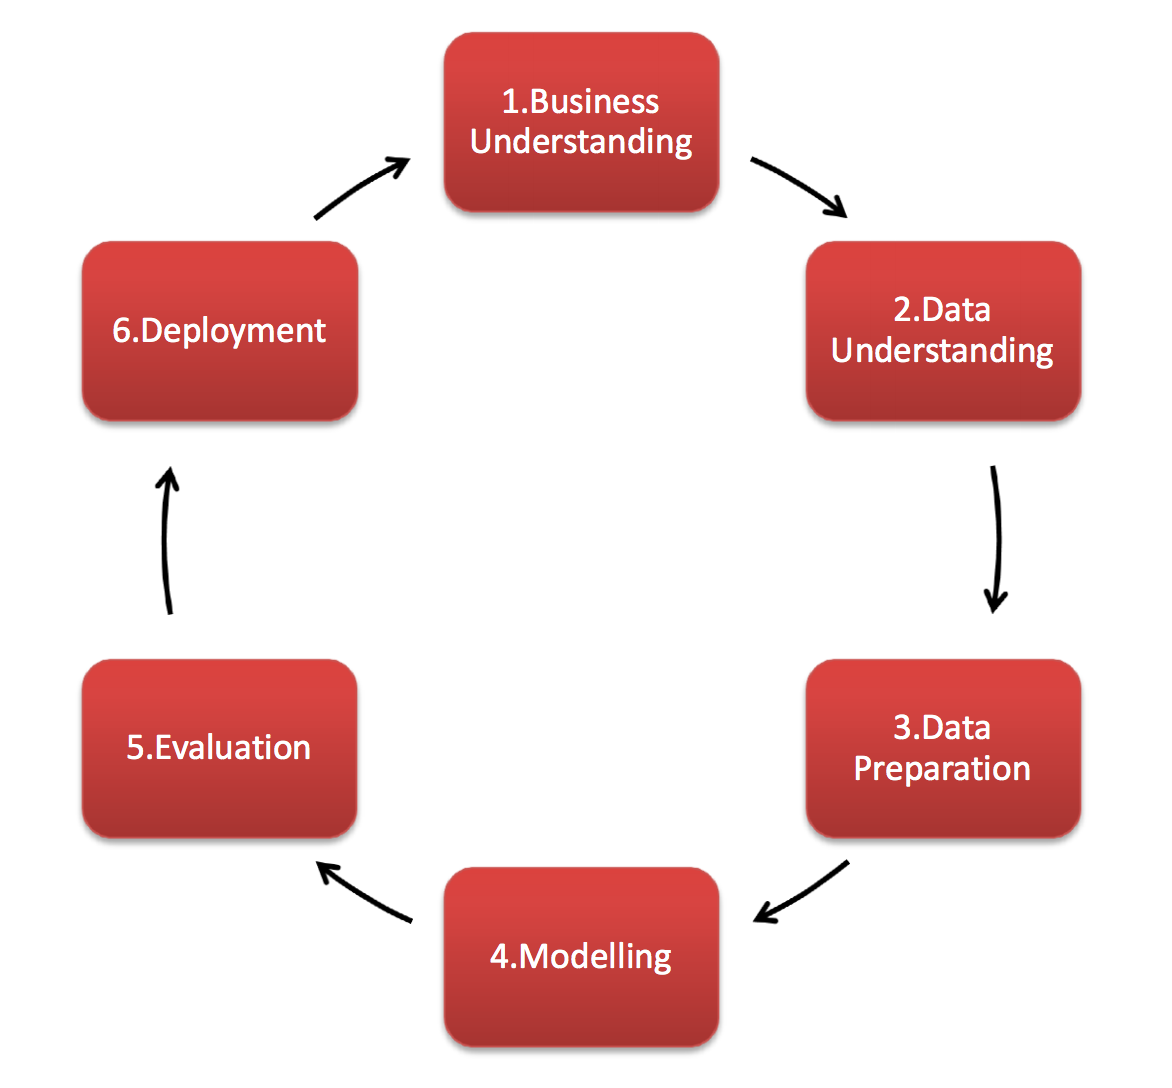

**Each phase of the process:**
2. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Report](#Datareport)
    2. [Describe Data](#Describedata)
    3. [Initial Data Exploration](#Exploredata) 
    4. [Verify Data Quality](#Verifydataquality)
        1. [Missing Data](#MissingData) 
        2. [Outliers](#Outliers) 
    5. [Data Quality Report](#Dataqualityreport)
3. [Data Preparation](#Datapreparation)
    1. [Select Your Data](#Selectyourdata)
    2. [Cleanse the Data](#Cleansethedata)
        1. [Label Encoding](#labelEncoding)
        2. [Drop Unnecessary Columns](#DropCols)
        3. [Altering Datatypes](#AlteringDatatypes)
        4. [Dealing With Zeros](#DealingZeros)
    3. [Construct Required Data](#Constructrequireddata)
    4. [Integrate Data](#Integratedata)
4. [Exploratory Data Analysis](#EDA)
5. [Modelling](#Modelling)
    1. [Modelling Technique](#ModellingTechnique)
    2. [Modelling Assumptions](#ModellingAssumptions)
    3. [Build Model](#BuildModel)
    4. [Assess Model](#AssessModel)
6. [Evaluation](#Evaluation)
7. [Deployment](#Deployment)

https://www.sv-europe.com/crisp-dm-methodology/


# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>
The second stage of the CRISP-DM process requires you to acquire the data listed in the project resources. This initial collection includes data loading, if this is necessary for data understanding. For example, if you use a specific tool for data understanding, it makes perfect sense to load your data into this tool. If you acquire multiple data sources then you need to consider how and when you're going to integrate these.

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
Initial data collection report - 
List the data sources acquired together with their locations, the methods used to acquire them and any problems encountered. Record problems you encountered and any resolutions achieved. This will help both with future replication of this project and with the execution of similar future projects.

In [15]:
# Import Libraries Required
#try:
#    import dask.dataframe as pd    
#except ImportError as e:
#    print(e)
#    import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib widget
import numpy as np
import seaborn as sns

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
#Data source: 
#Source Query location: 
path =  'data4_MiningProcess_Flotation_Plant_Database.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
#df =  pd.read_csv(path, parse_dates=['date'], index_col=0)
df =  pd.read_csv(path, parse_dates=['date'])
df = df.set_index(df.columns[0])

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
Data description report - Describe the data that has been acquired including its format, its quantity (for example, the number of records and fields in each table), the identities of the fields and any other surface features which have been discovered. Evaluate whether the data acquired satisfies your requirements.

In [18]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [19]:
df.shape

(184364, 24)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184364 entries, 553089 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          184364 non-null  datetime64[ns]
 1   % Iron Feed                   184364 non-null  float64       
 2   % Silica Feed                 184364 non-null  float64       
 3   Starch Flow                   184364 non-null  float64       
 4   Amina Flow                    184364 non-null  float64       
 5   Ore Pulp Flow                 184364 non-null  float64       
 6   Ore Pulp pH                   184364 non-null  float64       
 7   Ore Pulp Density              184364 non-null  float64       
 8   Flotation Column 01 Air Flow  184364 non-null  float64       
 9   Flotation Column 02 Air Flow  184364 non-null  float64       
 10  Flotation Column 03 Air Flow  184364 non-null  float64       
 11  Flotatio

renombramos las columnas con nombres más cortos

In [21]:
df.columns = ['date', 'iron_p', 'silica_p', 'starch_f', 'amina_f', 'ore_f', 'ore_pH', 'ore_density', 
           'c1_air_f', 'c2_air_f', 'c3_air_f', 'c4_air_f', 'c5_air_f', 'c6_air_f', 'c7_air_f',
           'c1_level', 'c2_level', 'c3_level', 'c4_level', 'c5_level', 'c6_level', 'c7_level',
           'final_iron_p', 'final_silica_p'
          ]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184364 entries, 553089 to 737452
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            184364 non-null  datetime64[ns]
 1   iron_p          184364 non-null  float64       
 2   silica_p        184364 non-null  float64       
 3   starch_f        184364 non-null  float64       
 4   amina_f         184364 non-null  float64       
 5   ore_f           184364 non-null  float64       
 6   ore_pH          184364 non-null  float64       
 7   ore_density     184364 non-null  float64       
 8   c1_air_f        184364 non-null  float64       
 9   c2_air_f        184364 non-null  float64       
 10  c3_air_f        184364 non-null  float64       
 11  c4_air_f        184364 non-null  float64       
 12  c5_air_f        184364 non-null  float64       
 13  c6_air_f        184364 non-null  float64       
 14  c7_air_f        184364 non-null

In [23]:
df.describe()

iron_p       silica_p       starch_f        amina_f  \
count  184364.000000  184364.000000  184364.000000  184364.000000   
mean       53.925443      17.258644    3041.361950     489.297447   
std         4.281784       6.740836    1132.277877      96.658742   
min        42.740000       1.310000       0.008880     241.669000   
25%        48.810000      10.800000    2465.937500     417.156000   
50%        54.590000      15.980000    3101.135000     502.704500   
75%        57.460000      24.900000    3769.530000     558.433000   
max        65.780000      33.400000    6299.880000     739.455000   

               ore_f         ore_pH    ore_density       c1_air_f  \
count  184364.000000  184364.000000  184364.000000  184364.000000   
mean      389.191574       9.645933       1.685689     297.825354   
std        13.770896       0.453452       0.054561      14.700098   
min       376.249000       8.753370       1.519830     175.558000   
25%       379.057471       9.348057       1.668580     299.310000   
50%       382.151952       9.705140       1.699255     299.881000   
75%       398.349500      10.006700       1.718250     300.411000   
max       418.641000      10.650300       1.853250     373.871000   

            c2_air_f       c3_air_f  ...       c7_air_f       c1_level  \
count  184364.000000  184364.000000  ...  184364.000000  184364.000000   
mean      292.133937     298.076718  ...     308.814903     490.536651   
std        21.911163      11.534684  ...      34.156295     110.705472   
min       175.899000     182.778000  ...     185.962000     149.218000   
25%       295.685000     298.449000  ...     293.684750     403.004000   
50%       299.226000     299.589000  ...     303.478500     490.545000   
75%       302.028000     301.433000  ...     347.772250     517.983000   
max       375.992000     364.346000  ...     371.593000     862.243000   

            c2_level       c3_level       c4_level      c5_level  \
count  184364.000000  184364.000000  184364.000000  184364.00000   
mean      503.955210     511.823061     405.249039     407.44875   
std        86.194894     137.694595      99.149764      92.25738   
min       210.760000     126.636000     162.201000     166.99100   
25%       482.219750     403.012000     343.668000     346.55700   
50%       501.769000     493.252500     382.866500     375.30450   
75%       524.014500     580.017000     464.681250     456.26525   
max       828.283000     886.754000     680.340000     675.25700   

            c6_level       c7_level   final_iron_p  final_silica_p  
count  184364.000000  184364.000000  184364.000000   184364.000000  
mean      420.191033     402.393474      64.749710        2.396139  
std        98.314004      88.284623       1.109163        1.166135  
min       156.004000     175.617000      62.110000        0.600000  
25%       347.893750     343.454000      64.040000        1.490000  
50%       398.010000     379.588500      65.020000        2.080000  
75%       496.401250     458.359000      65.440000        3.020000  
max       698.861000     659.902000      67.670000        5.530000  

[8 rows x 23 columns]

In [24]:
df.head(5)

date  iron_p  silica_p  starch_f  amina_f    ore_f  \
Unnamed: 0                                                                     
553089     2017-07-29 07:00:00   57.46      10.8   4310.75  508.545  397.090   
553090     2017-07-29 07:00:00   57.46      10.8   4336.64  507.568  396.211   
553091     2017-07-29 07:00:00   57.46      10.8   4352.02  516.113  393.457   
553092     2017-07-29 07:00:00   57.46      10.8   4358.71  512.329  396.855   
553093     2017-07-29 07:00:00   57.46      10.8   4362.83  516.235  403.711   

             ore_pH  ore_density  c1_air_f  c2_air_f  ...  c7_air_f  c1_level  \
Unnamed: 0                                            ...                       
553089      10.0188      1.67734   250.664   309.242  ...   296.235   474.470   
553090      10.0215      1.67722   251.807   302.388  ...   295.708   488.477   
553091      10.0242      1.67711   251.499   300.103  ...   294.302   495.083   
553092      10.0270      1.67700   252.422   300.454  ...   293.994   514.000   
553093      10.0297      1.67688   251.279   301.289  ...   297.334   515.710   

              c2_level  c3_level  c4_level  c5_level  c6_level  c7_level  \
Unnamed: 0                                                                 
553089      822.906164   411.461   368.672   362.084   340.180   341.317   
553090      823.088877   395.922   351.484   348.865   361.350   341.428   
553091      823.271589   385.887   330.859   341.484   358.101   353.566   
553092      823.454301   381.139   336.016   316.589   366.502   359.525   
553093      823.637014   370.887   332.969   329.587   339.956   362.505   

            final_iron_p  final_silica_p  
Unnamed: 0                                
553089             64.62            4.55  
553090             64.62            4.55  
553091             64.62            4.55  
553092             64.62            4.55  
553093             64.62            4.55  

[5 rows x 24 columns]

## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

Examine the quality of the data, addressing questions such as:

- Is the data complete (does it cover all the cases required)?
- Is it correct, or does it contain errors and, if there are errors, how common are they?
- Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?

### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
In addition to incorrect datatypes, another common problem when dealing with real-world data is missing values. These can arise for many reasons and have to be either filled in or removed before we train a machine learning model. First, let’s get a sense of how many missing values are in each column 

While we always want to be careful about removing information, if a column has a high percentage of missing values, then it probably will not be useful to our model. The threshold for removing columns should depend on the problem

In [25]:
df.isnull().sum()

date              0
iron_p            0
silica_p          0
starch_f          0
amina_f           0
ore_f             0
ore_pH            0
ore_density       0
c1_air_f          0
c2_air_f          0
c3_air_f          0
c4_air_f          0
c5_air_f          0
c6_air_f          0
c7_air_f          0
c1_level          0
c2_level          0
c3_level          0
c4_level          0
c5_level          0
c6_level          0
c7_level          0
final_iron_p      0
final_silica_p    0
dtype: int64

In [26]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [27]:
missing_values_table(df)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

No hay ningún valor vacio. Parece que el dataset esta limpio y trabajado.
Como no hay columnas con mucho datos «missing,» las 2 proximas operaciones no son necesarias

In [28]:
# # Get the columns with > 50% missing
# missing_df = missing_values_table(df);
# missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
# print('We will remove %d columns.' % len(missing_columns))

In [29]:
# # Drop the columns
# df = df.drop(list(missing_columns))

### 2.3.2 Duplicated data

Vamos a ver si hay filas reptedas.

In [30]:
dup_mask = df.duplicated()
print('Hay {} filas repetidas'.format(dup_mask.sum()))

Hay 0 filas repetidas


No hay filas completamente repetidas; ¿pero tenemos filas con el mismo `date

In [31]:
df['date'].value_counts(sort=False).sort_index()

2017-07-29 07:00:00     44
2017-07-29 08:00:00    180
2017-07-29 09:00:00    180
2017-07-29 10:00:00    180
2017-07-29 11:00:00    180
                      ... 
2017-09-09 19:00:00    180
2017-09-09 20:00:00    180
2017-09-09 21:00:00    180
2017-09-09 22:00:00    180
2017-09-09 23:00:00    180
Name: date, Length: 1025, dtype: int64

Por cada hora tenemos 180 filas. Excepto la primera hora que tiene 44. Esto sugiere que que son las últimas 44 medidas del ese día (al ser el primer dia del dataset). Tenemos 3600 segundos en 1 hora; por lo que podemos concluir que efectivamente, como especifica la documentación del dataset; se mide cada 20 segundos. La documentación menciona que algunas columns se han sampleado cada 20 segundos y otras cada hora. ¿Pero como descubrir cuales?

Vamos a añadir los segundos a `date`. Los segundos seran el índice de fila (movido 44 filas, por las prieras que tenemos de una hora no completa), multiplicado por 20 (el tiempo entre filas. A esté númoero tenemos que aplicarle el modulo 3600 (para tener en cuenta que `date` cambia de hor)

In [32]:
df['seconds'] = (((np.arange(len(df))-44)*20) % 3600)

In [33]:
# comprobamos algúnos valores
df.iloc[0][['date','seconds']]
df.iloc[43][['date','seconds']]
df.iloc[44][['date','seconds']]
df.iloc[45][['date','seconds']]
df.iloc[43+180][['date','seconds']]
df.iloc[44+180][['date','seconds']]
df.iloc[45+180][['date','seconds']]

date       2017-07-29 07:00:00
seconds                   2720
Name: 553089, dtype: object

date       2017-07-29 07:00:00
seconds                   3580
Name: 553132, dtype: object

date       2017-07-29 08:00:00
seconds                      0
Name: 553133, dtype: object

date       2017-07-29 08:00:00
seconds                     20
Name: 553134, dtype: object

date       2017-07-29 08:00:00
seconds                   3580
Name: 553312, dtype: object

date       2017-07-29 09:00:00
seconds                      0
Name: 553313, dtype: object

date       2017-07-29 09:00:00
seconds                     20
Name: 553314, dtype: object

Parece que los segundos se han asignado correctamente. Ahora añadiremos estos segundos a `date` y convertiremos el nuevo `date` como el `index` del dataframe.

In [34]:
df['datetime'] = df['date'] + pd.to_timedelta(df['seconds'], unit='s')


Vamos a comprobar las mismas filas que más arriba.

In [35]:
# comprobamos algúnos valores
df.iloc[0][['date','seconds','datetime']]
df.iloc[43][['date','seconds','datetime']]
df.iloc[44][['date','seconds','datetime']]
df.iloc[45][['date','seconds', 'datetime']]
df.iloc[43+180][['date','seconds','datetime']]
df.iloc[44+180][['date','seconds','datetime']]
df.iloc[45+180][['date','seconds','datetime']]

date        2017-07-29 07:00:00
seconds                    2720
datetime    2017-07-29 07:45:20
Name: 553089, dtype: object

date        2017-07-29 07:00:00
seconds                    3580
datetime    2017-07-29 07:59:40
Name: 553132, dtype: object

date        2017-07-29 08:00:00
seconds                       0
datetime    2017-07-29 08:00:00
Name: 553133, dtype: object

date        2017-07-29 08:00:00
seconds                      20
datetime    2017-07-29 08:00:20
Name: 553134, dtype: object

date        2017-07-29 08:00:00
seconds                    3580
datetime    2017-07-29 08:59:40
Name: 553312, dtype: object

date        2017-07-29 09:00:00
seconds                       0
datetime    2017-07-29 09:00:00
Name: 553313, dtype: object

date        2017-07-29 09:00:00
seconds                      20
datetime    2017-07-29 09:00:20
Name: 553314, dtype: object

Los timepos están bien asignados. Pasaremos `datetime` como el index del dataframe. Borramos `date` y `seconds`; y guardamos los nuevos datos.

In [36]:
df.set_index('datetime', inplace=True);
df.drop(['seconds', 'date'], axis=1, inplace=True);
df.to_pickle('flotation_plant.pkl'),

(None,)

In [37]:
df.index

DatetimeIndex(['2017-07-29 07:45:20', '2017-07-29 07:45:40',
               '2017-07-29 07:46:00', '2017-07-29 07:46:20',
               '2017-07-29 07:46:40', '2017-07-29 07:47:00',
               '2017-07-29 07:47:20', '2017-07-29 07:47:40',
               '2017-07-29 07:48:00', '2017-07-29 07:48:20',
               ...
               '2017-09-09 23:56:40', '2017-09-09 23:57:00',
               '2017-09-09 23:57:20', '2017-09-09 23:57:40',
               '2017-09-09 23:58:00', '2017-09-09 23:58:20',
               '2017-09-09 23:58:40', '2017-09-09 23:59:00',
               '2017-09-09 23:59:20', '2017-09-09 23:59:40'],
              dtype='datetime64[ns]', name='datetime', length=184364, freq=None)

### 2.3.3. Relations between variables.

Tenemos dos pares de valores que representan porcentajes de materia: hierro y silico en la mezcla inicial, y hierro y silicio al final. Comprobaremos que la suma de los dos es menor al 100% (En la estadística inicial se puede coprobar que el valor de cada variable es menor de 100%)

In [38]:
initial_material = df.iron_p + df.silica_p
final_material = df.final_iron_p + df.final_silica_p
print(initial_material.min(), initial_material.max())
print(final_material.min(),final_material.max())

66.25 76.59
64.92999999999999 69.44


Parece que no hay datos erroneos a este respecto. El material final debe de tener otro constituyente diferente al hierro y silicio que no hay al princio, pero que no se consierá impureza. El silicio seolo es considerado impureza.

### 2.3.4. Outliers <a class="anchor" id="Outliers"></a>
At this point, we may also want to remove outliers. These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values. For this project, we will remove anomalies based on the definition of extreme outliers:

https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

- Below the first quartile − 3 ∗ interquartile range
- Above the third quartile + 3 ∗ interquartile range

In [39]:
# calulamos el primer cuartil
Q1 = df.quantile(0.25, axis=0)
# calculamos el tercer cuartíl
Q3 = df.quantile(0.75, axis=0)
# La distancia intercuartíl
IQR = Q3-Q1
print(IQR)

iron_p               8.650000
silica_p            14.100000
starch_f          1303.592500
amina_f            141.277000
ore_f               19.292029
ore_pH               0.658643
ore_density          0.049670
c1_air_f             1.101000
c2_air_f             6.343000
c3_air_f             2.984000
c4_air_f             4.532713
c5_air_f             3.901637
c6_air_f            49.338000
c7_air_f            54.087500
c1_level           114.979000
c2_level            41.794750
c3_level           177.005000
c4_level           121.013250
c5_level           109.708250
c6_level           148.507500
c7_level           114.905000
final_iron_p         1.400000
final_silica_p       1.530000
dtype: float64


Los `ooutliers` serán los que estén fuera $3IQR$.

In [40]:
lower = Q1 - 3*IQR
upper = Q3 + 3*IQR
outliers_mask = (df < lower) | (df > upper)
print(outliers_mask.sum())
print(outliers_mask.sum().sum())
print(outliers_mask.sum().sum()/len(df)*100)

iron_p                0
silica_p              0
starch_f              0
amina_f               0
ore_f                 0
ore_pH                0
ore_density           0
c1_air_f           7000
c2_air_f          27135
c3_air_f           5302
c4_air_f              0
c5_air_f              0
c6_air_f              0
c7_air_f              0
c1_level              0
c2_level          15525
c3_level              0
c4_level              0
c5_level              0
c6_level              0
c7_level              0
final_iron_p          0
final_silica_p        0
dtype: int64
54962
29.811676900045565


Tenemos `outliers` en 4 columnas. Si eliminamos todas las filas con outliers, borraremos un total de 54962 filas; un 30 % de los datos. Vamos a investigar cuantas filas tienen outliers. 

In [41]:
outliers_filas = outliers_mask.sum(axis=1)
#print(outliers_filas)
n_outliers = outliers_filas.value_counts()
print(n_outliers)

0    143351
1     33189
2      4082
4      2383
3      1359
dtype: int64


No tenemos conocimiento experto para valorar si los `outliers` no son valores erroneos. De momento los eliminares y si hay tiempo realizaremos un estudio más pormenorizado.

In [42]:
df_without_outliers = df[~outliers_mask.any(axis=1)]
print(df_without_outliers.shape)
print(df_without_outliers.index)
df.index

(143351, 23)
DatetimeIndex(['2017-07-29 12:49:40', '2017-07-29 12:50:00',
               '2017-07-29 12:50:20', '2017-07-29 12:50:40',
               '2017-07-29 12:51:00', '2017-07-29 12:51:20',
               '2017-07-29 12:51:40', '2017-07-29 12:52:00',
               '2017-07-29 12:52:20', '2017-07-29 12:52:40',
               ...
               '2017-09-09 23:56:40', '2017-09-09 23:57:00',
               '2017-09-09 23:57:20', '2017-09-09 23:57:40',
               '2017-09-09 23:58:00', '2017-09-09 23:58:20',
               '2017-09-09 23:58:40', '2017-09-09 23:59:00',
               '2017-09-09 23:59:20', '2017-09-09 23:59:40'],
              dtype='datetime64[ns]', name='datetime', length=143351, freq=None)


DatetimeIndex(['2017-07-29 07:45:20', '2017-07-29 07:45:40',
               '2017-07-29 07:46:00', '2017-07-29 07:46:20',
               '2017-07-29 07:46:40', '2017-07-29 07:47:00',
               '2017-07-29 07:47:20', '2017-07-29 07:47:40',
               '2017-07-29 07:48:00', '2017-07-29 07:48:20',
               ...
               '2017-09-09 23:56:40', '2017-09-09 23:57:00',
               '2017-09-09 23:57:20', '2017-09-09 23:57:40',
               '2017-09-09 23:58:00', '2017-09-09 23:58:20',
               '2017-09-09 23:58:40', '2017-09-09 23:59:00',
               '2017-09-09 23:59:20', '2017-09-09 23:59:40'],
              dtype='datetime64[ns]', name='datetime', length=184364, freq=None)

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
During this stage you'll address data mining questions using querying, data visualization and reporting techniques. These may include:

- **Distribution** of key attributes (for example, the target attribute of a prediction task)
- **Relationships** between pairs or small numbers of attributes
- Results of **simple aggregations**
- **Properties** of significant sub-populations
- **Simple** statistical analyses

These analyses may directly address your data mining goals. They may also contribute to or refine the data description and quality reports, and feed into the transformation and other data preparation steps needed for further analysis. 

- **Data exploration report** - Describe results of your data exploration, including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate you could include graphs and plots here to indicate data characteristics that suggest further examination of interesting data subsets.

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

In [43]:
# counti values in col. Not useful because our columns are all real numbers. 
# This can be valuable for integer values.
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [44]:
# Histogram
def hist_chart(df, col, bins=10):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), bins=bins, edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);

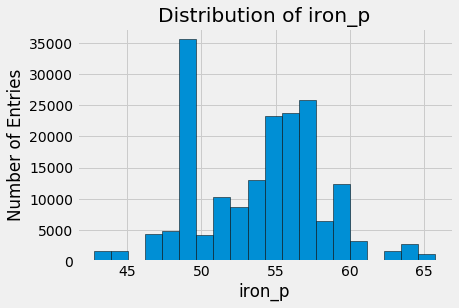

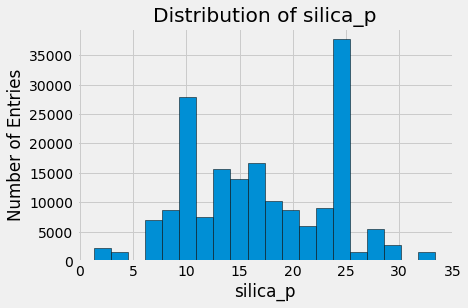

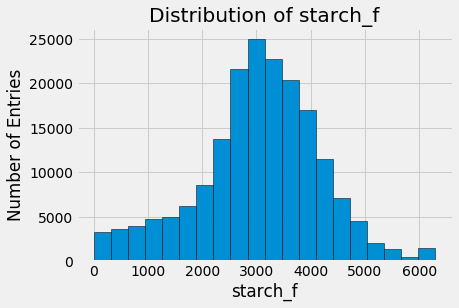

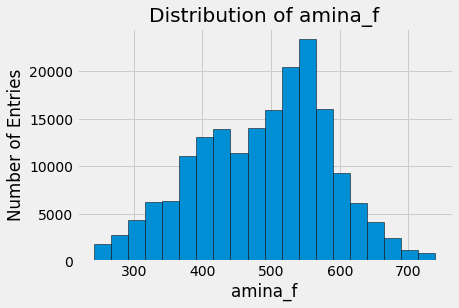

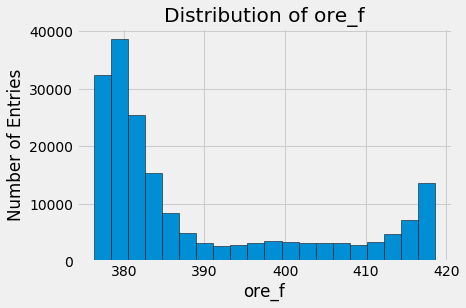

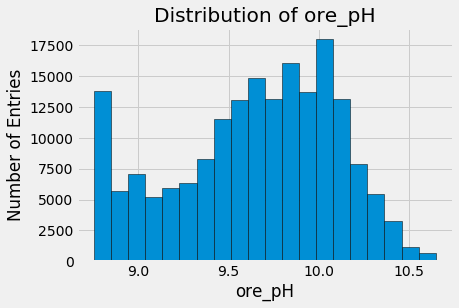

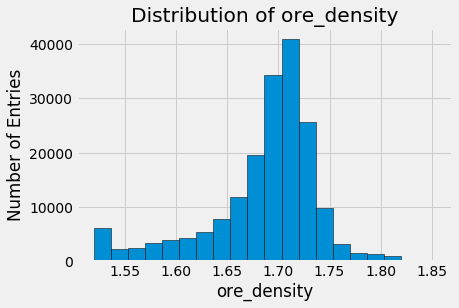

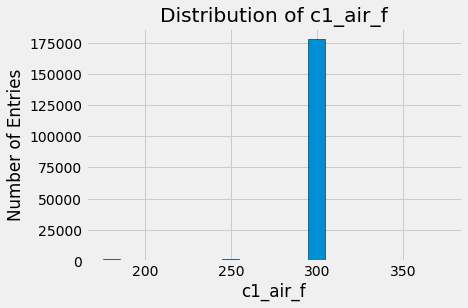

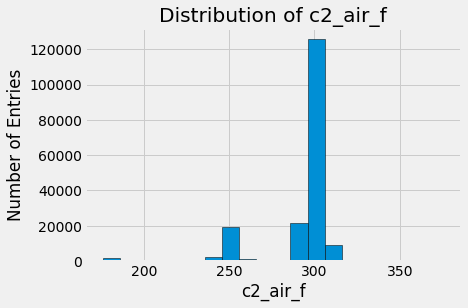

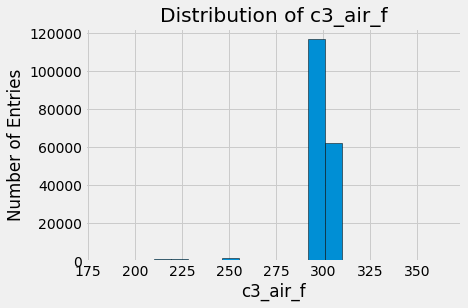

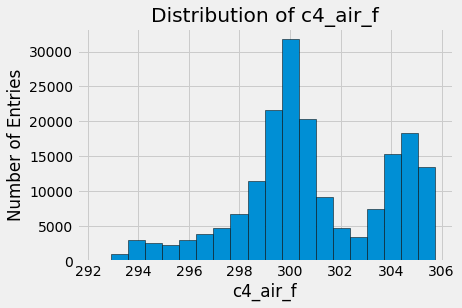

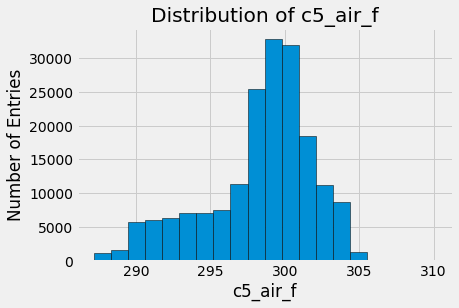

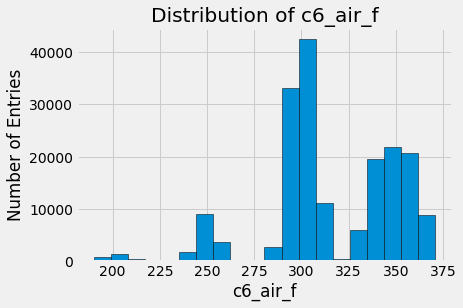

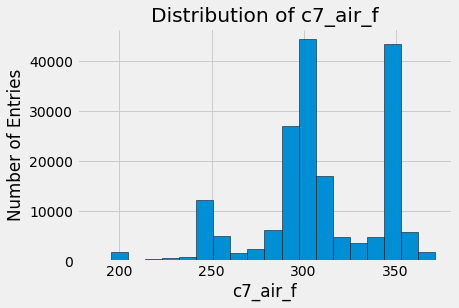

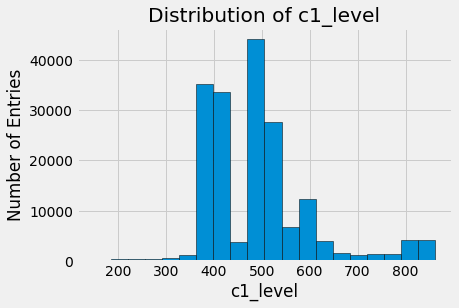

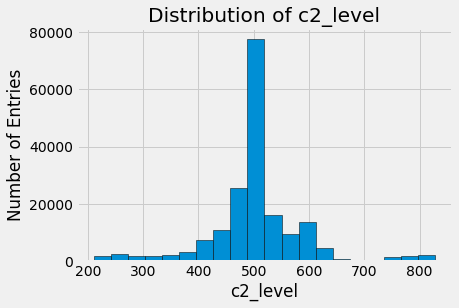

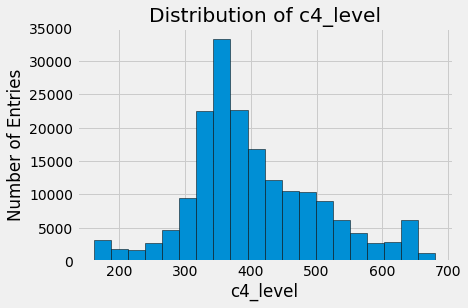

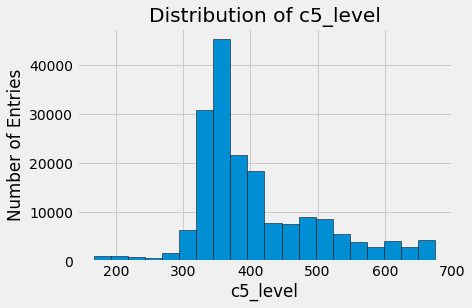

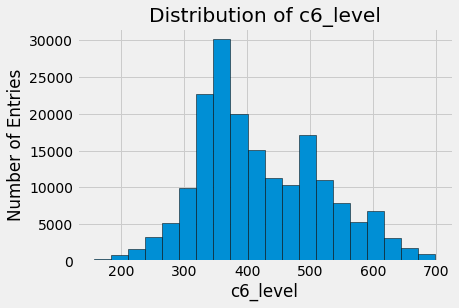

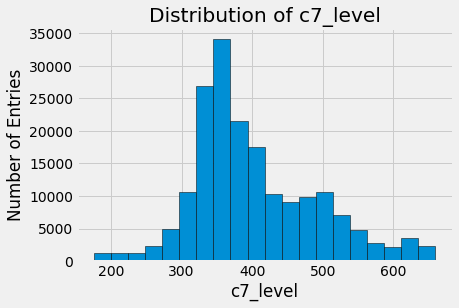

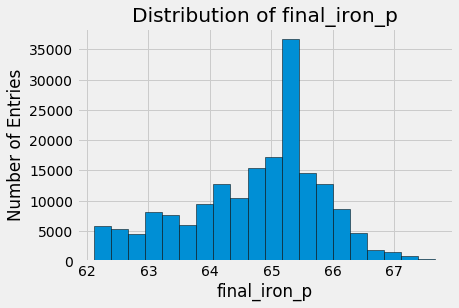

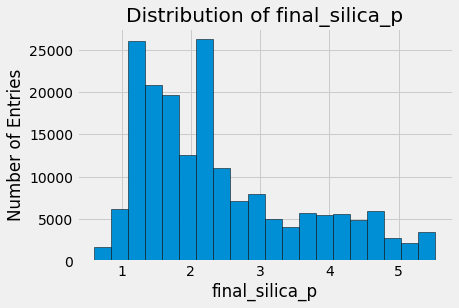

In [45]:
for col in df.columns:
#col = 'iron_p'
# Histogram & Results
    hist_chart(df, col, bins=20)
#count_values_table(df[col])
    plt.show()

Ninguna columnas tienen una distribución que podriamos considerar gaussiana. Es interesante ver el gap entre los valores del flujo de aire de las columnas 1, 2, 3. Podrían denotar distintos modos de operación.

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
Can we derive any correlation from this data-set. Pairplot chart gives us correlations, distributions and regression path
Correlogram are awesome for exploratory analysis. It allows to quickly observe the relationship between every variable of your matrix. 
It is easy to do it with seaborn: just call the pairplot function

Pairplot Documentation cab be found here: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [46]:
#Seaborn allows to make a correlogram or correlation matrix really easily. 
#sns.pairplot(df.dropna().drop(['x'], axis=1), hue='y', kind ='reg')
#sns.pairplot(df)
df_corr = df.corr()
df_corr
df_corr[abs(df_corr) > 0.1]
#plt.show()


iron_p  silica_p  starch_f   amina_f     ore_f    ore_pH  \
iron_p          1.000000 -0.982118 -0.043374 -0.029217  0.117874 -0.246863   
silica_p       -0.982118  1.000000  0.052866  0.015780 -0.140681  0.210333   
starch_f       -0.043374  0.052866  1.000000  0.293735  0.171883  0.109672   
amina_f        -0.029217  0.015780  0.293735  1.000000  0.461638  0.040370   
ore_f           0.117874 -0.140681  0.171883  0.461638  1.000000  0.008209   
ore_pH         -0.246863  0.210333  0.109672  0.040370  0.008209  1.000000   
ore_density    -0.019214  0.029035  0.341457  0.549297  0.096907  0.141952   
c1_air_f        0.062589 -0.069515  0.205791  0.098350  0.031973  0.051602   
c2_air_f       -0.064209  0.089525  0.149310  0.060432 -0.020465 -0.216701   
c3_air_f        0.081008 -0.086007  0.165994  0.115295  0.045756  0.045968   
c4_air_f       -0.200722  0.212495  0.038193 -0.059017 -0.045928  0.272433   
c5_air_f        0.084424 -0.097559  0.053594 -0.060223  0.146959 -0.196922   
c6_air_f        0.036413 -0.031122  0.107679  0.176484  0.046574  0.005083   
c7_air_f        0.078682 -0.076584  0.049204  0.092016  0.013169  0.138136   
c1_level       -0.110960  0.122764 -0.087898 -0.209066 -0.170371  0.036400   
c2_level       -0.048996  0.065127 -0.096031 -0.091544 -0.148752  0.028131   
c3_level       -0.163922  0.164434 -0.111639 -0.209296 -0.189806  0.103387   
c4_level        0.084064 -0.094470 -0.099525 -0.278029 -0.078718  0.001429   
c5_level        0.085126 -0.083834 -0.132824 -0.265242 -0.053831 -0.075378   
c6_level        0.103242 -0.088485 -0.039524 -0.192033 -0.096655 -0.148373   
c7_level        0.105150 -0.109121 -0.124950 -0.276076 -0.048830 -0.083124   
final_iron_p    0.102756 -0.093330  0.008726 -0.232467  0.013084  0.156271   
final_silica_p -0.081979  0.075434  0.019876  0.341301  0.067710 -0.105930   

                ore_density  c1_air_f  c2_air_f  c3_air_f  ...  c7_air_f  \
iron_p            -0.019214  0.062589 -0.064209  0.081008  ...  0.078682   
silica_p           0.029035 -0.069515  0.089525 -0.086007  ... -0.076584   
starch_f           0.341457  0.205791  0.149310  0.165994  ...  0.049204   
amina_f            0.549297  0.098350  0.060432  0.115295  ...  0.092016   
ore_f              0.096907  0.031973 -0.020465  0.045756  ...  0.013169   
ore_pH             0.141952  0.051602 -0.216701  0.045968  ...  0.138136   
ore_density        1.000000  0.291889  0.226547  0.224256  ...  0.105031   
c1_air_f           0.291889  1.000000  0.547724  0.769356  ...  0.378013   
c2_air_f           0.226547  0.547724  1.000000  0.455622  ...  0.223530   
c3_air_f           0.224256  0.769356  0.455622  1.000000  ...  0.327892   
c4_air_f           0.012702  0.187189  0.134719  0.222693  ...  0.289831   
c5_air_f          -0.056254  0.177819  0.136050  0.141511  ... -0.090563   
c6_air_f           0.100450  0.394656  0.215958  0.354693  ...  0.661801   
c7_air_f           0.105031  0.378013  0.223530  0.327892  ...  1.000000   
c1_level          -0.199349 -0.225361 -0.138127 -0.175058  ... -0.034993   
c2_level          -0.146444 -0.291650 -0.247456 -0.199505  ... -0.079720   
c3_level          -0.192292 -0.223826 -0.141932 -0.242210  ... -0.143117   
c4_level          -0.193931 -0.157024 -0.210246 -0.161887  ... -0.163707   
c5_level          -0.268297 -0.282114 -0.276969 -0.201183  ... -0.181092   
c6_level          -0.075927 -0.212667 -0.145453 -0.237380  ... -0.225289   
c7_level          -0.261660 -0.233506 -0.270075 -0.208060  ... -0.250630   
final_iron_p      -0.011976  0.131323 -0.060871  0.152734  ...  0.038087   
final_silica_p     0.059548 -0.126239 -0.005008 -0.113865  ...  0.025364   

                c1_level  c2_level  c3_level  c4_level  c5_level  c6_level  \
iron_p         -0.110960 -0.048996 -0.163922  0.084064  0.085126  0.103242   
silica_p        0.122764  0.065127  0.164434 -0.094470 -0.083834 -0.088485   
starch_f       -0.087898 -0.096031 -0.111639 -0.099525 -0.132824 -0.039524   
amina_f 

iron_p  silica_p  starch_f   amina_f     ore_f    ore_pH  \
iron_p          1.000000 -0.982118       NaN       NaN  0.117874 -0.246863   
silica_p       -0.982118  1.000000       NaN       NaN -0.140681  0.210333   
starch_f             NaN       NaN  1.000000  0.293735  0.171883  0.109672   
amina_f              NaN       NaN  0.293735  1.000000  0.461638       NaN   
ore_f           0.117874 -0.140681  0.171883  0.461638  1.000000       NaN   
ore_pH         -0.246863  0.210333  0.109672       NaN       NaN  1.000000   
ore_density          NaN       NaN  0.341457  0.549297       NaN  0.141952   
c1_air_f             NaN       NaN  0.205791       NaN       NaN       NaN   
c2_air_f             NaN       NaN  0.149310       NaN       NaN -0.216701   
c3_air_f             NaN       NaN  0.165994  0.115295       NaN       NaN   
c4_air_f       -0.200722  0.212495       NaN       NaN       NaN  0.272433   
c5_air_f             NaN       NaN       NaN       NaN  0.146959 -0.196922   
c6_air_f             NaN       NaN  0.107679  0.176484       NaN       NaN   
c7_air_f             NaN       NaN       NaN       NaN       NaN  0.138136   
c1_level       -0.110960  0.122764       NaN -0.209066 -0.170371       NaN   
c2_level             NaN       NaN       NaN       NaN -0.148752       NaN   
c3_level       -0.163922  0.164434 -0.111639 -0.209296 -0.189806  0.103387   
c4_level             NaN       NaN       NaN -0.278029       NaN       NaN   
c5_level             NaN       NaN -0.132824 -0.265242       NaN       NaN   
c6_level        0.103242       NaN       NaN -0.192033       NaN -0.148373   
c7_level        0.105150 -0.109121 -0.124950 -0.276076       NaN       NaN   
final_iron_p    0.102756       NaN       NaN -0.232467       NaN  0.156271   
final_silica_p       NaN       NaN       NaN  0.341301       NaN -0.105930   

                ore_density  c1_air_f  c2_air_f  c3_air_f  ...  c7_air_f  \
iron_p                  NaN       NaN       NaN       NaN  ...       NaN   
silica_p                NaN       NaN       NaN       NaN  ...       NaN   
starch_f           0.341457  0.205791  0.149310  0.165994  ...       NaN   
amina_f            0.549297       NaN       NaN  0.115295  ...       NaN   
ore_f                   NaN       NaN       NaN       NaN  ...       NaN   
ore_pH             0.141952       NaN -0.216701       NaN  ...  0.138136   
ore_density        1.000000  0.291889  0.226547  0.224256  ...  0.105031   
c1_air_f           0.291889  1.000000  0.547724  0.769356  ...  0.378013   
c2_air_f           0.226547  0.547724  1.000000  0.455622  ...  0.223530   
c3_air_f           0.224256  0.769356  0.455622  1.000000  ...  0.327892   
c4_air_f                NaN  0.187189  0.134719  0.222693  ...  0.289831   
c5_air_f                NaN  0.177819  0.136050  0.141511  ...       NaN   
c6_air_f           0.100450  0.394656  0.215958  0.354693  ...  0.661801   
c7_air_f           0.105031  0.378013  0.223530  0.327892  ...  1.000000   
c1_level          -0.199349 -0.225361 -0.138127 -0.175058  ...       NaN   
c2_level          -0.146444 -0.291650 -0.247456 -0.199505  ...       NaN   
c3_level          -0.192292 -0.223826 -0.141932 -0.242210  ... -0.143117   
c4_level          -0.193931 -0.157024 -0.210246 -0.161887  ... -0.163707   
c5_level          -0.268297 -0.282114 -0.276969 -0.201183  ... -0.181092   
c6_level                NaN -0.212667 -0.145453 -0.237380  ... -0.225289   
c7_level          -0.261660 -0.233506 -0.270075 -0.208060  ... -0.250630   
final_iron_p            NaN  0.131323       NaN  0.152734  ...       NaN   
final_silica_p          NaN -0.126239       NaN -0.113865  ...       NaN   

                c1_level  c2_level  c3_level  c4_level  c5_level  c6_level  \
iron_p         -0.110960       NaN -0.163922       NaN       NaN  0.103242   
silica_p        0.122764       NaN  0.164434       NaN       NaN       NaN   
starch_f             NaN       NaN -0.111639       NaN -0.132824       NaN   
amina_f 

La única correlación alta es entre la cantidad de hierro y silica en la entrada del proceso. Es lógico, a menor cantidad de impureza mayor cnatidad de mineral; de ahí el signo negativo de la correlación.

In [47]:
# Parece que esto no tiene aplicación en nuestro caso
#df_agg = df.drop(['x'], axis=1).groupby(['y']).sum()
#df_agg = df.groupby(['y']).sum()

### Differencing
Differencing
Specifically, a new series is constructed where the value at the current time step is calculated 
as the difference between the original observation and the observation at the previous time step.
value(t) = observation(t) - observation(t-1)

La medida del $\mathrm{SiO}_2$ tarda una hora en obtenerse. Por lo tanto el valor de silice real en el instante del `timestamp` (index del DataFrame), el el valor de `timestamp` + 1 hora. (1 hora equivale a 180 medidas). 

In [48]:
df['final_silica_p_lag1'] = df.final_silica_p.shift(freq='-1h')

También vamos a coalcular añadir una columna con la cantidad de silice de una hora antes. Puesto que el proceso es dinámico y tarda tiempo desconocido en llevarse a cabo, puede ser de interes, usar como predictor el sílice que había una hora antes. Como la medida de laboratorio lleva otra hora, teemos que apicar un cambio de indice de 2h.

In [49]:
df['final_silica_p_lag2'] = df.final_silica_p.shift(freq='-2h')

In [50]:
#Differencing
#Specifically, a new series is constructed where the value at the current time step is calculated 
#as the difference between the original observation and the observation at the previous time step.
#value(t) = observation(t) - observation(t-1)
# df_dif = df_dif_agg.diff()

## 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>
List the results of the data quality verification. If quality problems exist, suggest possible solutions. Solutions to data quality problems generally depend heavily on both data and business knowledge.

El resumen de las conclusiones obtenidas en esta parte del análisis se encunetra en el informe.

# 3. Stage Three - Data Preperation <a class="anchor" id="Datapreperation"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

## 3.1 Select Your Data <a class="anchor" id="Selectyourdata"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

Rationale for inclusion/exclusion - List the data to be included/excluded and the reasons for these decisions.

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>
This task involves raise the data quality to the level required by the analysis techniques that you've selected. This may involve selecting clean subsets of the data, the insertion of suitable defaults, or more ambitious techniques such as the estimation of missing data by modelling.

### 3.2.1 Label Encoding <a class="anchor" id="labelEncoding"></a>
Label Encoding to turn Categorical values to Integers

An approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. For example, the body_style column contains 5 different values. We could choose to encode it like this:

convertible -> 0
hardtop -> 1
hatchback -> 2
sedan -> 3
wagon -> 4
http://pbpython.com/categorical-encoding.html

In [51]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# for col in CAT_COLS:
#         encoder = LabelEncoder()
#         X_train[col] = encoder.fit_transform(X_train[col].astype(str))
#        X_test[col] = encoder.transform(X_test[col].astype(str))

In [52]:
# df["column"] = df["column"].astype('category')
# df.dtypes

In [53]:
# df["column"] = df["column"].cat.codes
# df.head()

No tenemos ninguna colunna de datos categórica; por lo que no tenemos que transformar datos en números.


### 3.2.2 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>
Sometimes we may not need certain columns. We can drop to keep only relevent data

Nuestro `target` a predecir será `final_silica_p_lag1`, por lo que podemos quitar la column `final_silica_p`. También eliminamos la cantidad de hierro, puesto que está muy correlacionada con la variable target

In [54]:
del_col_list = ['final_silica_p', 'final_iron_p']

df = df.drop(del_col_list, axis=1)
df.head()

iron_p  silica_p  starch_f  amina_f    ore_f   ore_pH  \
datetime                                                                     
2017-07-29 07:45:20   57.46      10.8   4310.75  508.545  397.090  10.0188   
2017-07-29 07:45:40   57.46      10.8   4336.64  507.568  396.211  10.0215   
2017-07-29 07:46:00   57.46      10.8   4352.02  516.113  393.457  10.0242   
2017-07-29 07:46:20   57.46      10.8   4358.71  512.329  396.855  10.0270   
2017-07-29 07:46:40   57.46      10.8   4362.83  516.235  403.711  10.0297   

                     ore_density  c1_air_f  c2_air_f  c3_air_f  ...  c7_air_f  \
datetime                                                        ...             
2017-07-29 07:45:20      1.67734   250.664   309.242   302.387  ...   296.235   
2017-07-29 07:45:40      1.67722   251.807   302.388   300.850  ...   295.708   
2017-07-29 07:46:00      1.67711   251.499   300.103   300.762  ...   294.302   
2017-07-29 07:46:20      1.67700   252.422   300.454   300.103  ...   293.994   
2017-07-29 07:46:40      1.67688   251.279   301.289   299.927  ...   297.334   

                     c1_level    c2_level  c3_level  c4_level  c5_level  \
datetime                                                                  
2017-07-29 07:45:20   474.470  822.906164   411.461   368.672   362.084   
2017-07-29 07:45:40   488.477  823.088877   395.922   351.484   348.865   
2017-07-29 07:46:00   495.083  823.271589   385.887   330.859   341.484   
2017-07-29 07:46:20   514.000  823.454301   381.139   336.016   316.589   
2017-07-29 07:46:40   515.710  823.637014   370.887   332.969   329.587   

                     c6_level  c7_level  final_silica_p_lag1  \
datetime                                                       
2017-07-29 07:45:20   340.180   341.317                 2.97   
2017-07-29 07:45:40   361.350   341.428                 2.97   
2017-07-29 07:46:00   358.101   353.566                 2.97   
2017-07-29 07:46:20   366.502   359.525                 2.97   
2017-07-29 07:46:40   339.956   362.505                 2.97   

                     final_silica_p_lag2  
datetime                                  
2017-07-29 07:45:20                  3.3  
2017-07-29 07:45:40                  3.3  
2017-07-29 07:46:00                  3.3  
2017-07-29 07:46:20                  3.3  
2017-07-29 07:46:40                  3.3  

[5 rows x 23 columns]

En este apartado vamos a ver la posible contribución de cada `feature` a la varianza dle target que queremos predecir. Primero vemos la varianza relativa de cada columna.

In [55]:
df.std()/df.mean()*10

iron_p                 0.794019
silica_p               3.905774
starch_f               3.722930
amina_f                1.975460
ore_f                  0.353833
ore_pH                 0.470097
ore_density            0.323675
c1_air_f               0.493581
c2_air_f               0.750038
c3_air_f               0.386970
c4_air_f               0.095945
c5_air_f               0.122144
c6_air_f               1.093379
c7_air_f               1.106044
c1_level               2.256824
c2_level               1.710368
c3_level               2.690277
c4_level               2.446638
c5_level               2.264270
c6_level               2.339745
c7_level               2.193987
final_silica_p_lag1    4.868590
final_silica_p_lag2    4.871385
dtype: float64

La varianza relatvia del flujo de aire de la columna 4 (`c4_air_f`) es menor del 1%. Puede ser un candito inicail a feature que no contribuye mucho. Sin embargo, primero vamos a aplicar otras técnicas para explicar la varianza el target. Vamos a intentar quedarnos con 15 º

#### 3.2.2.1 Recursive Feature Elimination

Vamos a selecionar 15 features usando RFE. Como estimador usaremos un SVR.

In [56]:
%%time

from sklearn.feature_selection import RFE
from sklearn.svm import SVR
df_clean = df.dropna()

print(len(df))
number_of_observations = 1000

X = df_clean.drop(['final_silica_p_lag1'], axis=1)
y = df_clean['final_silica_p_lag1']
estimator = SVR(kernel="linear")
selector = RFE(estimator, 15, step=1)
selector = selector.fit(X.iloc[:number_of_observations,:], y.iloc[:number_of_observations])
selector.support_
selector.ranking_

184364
CPU times: user 11min 31s, sys: 1.35 s, total: 11min 32s
Wall time: 11min 34s


array([7, 8, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 3, 2, 1, 1])

In [57]:
print(X.columns[selector.support_])

Index(['amina_f', 'ore_f', 'ore_pH', 'ore_density', 'c1_air_f', 'c2_air_f',
       'c3_air_f', 'c4_air_f', 'c5_air_f', 'c6_air_f', 'c7_air_f', 'c2_level',
       'c3_level', 'c7_level', 'final_silica_p_lag2'],
      dtype='object')


#### 3.2.2.2 Usando el regresor Lasso para selectionar features

In [58]:
%%time
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression

df_clean = df.dropna()

last = len(df)
number_of_observations = 100000
#number_of_observations = last

X = df_clean.drop(['final_silica_p_lag1'], axis=1)
y = df_clean['final_silica_p_lag1']
clf = LassoCV(normalize=True)
#clf = LogisticRegression()
# Set a minimum threshold of 0.025
sfm = SelectFromModel(clf)
sfm.fit(X, y)
# X_transform = sfm.transform(X)
# n_features = sfm.transform(X).shape[1]
# print(n_features)
X.columns[sfm.get_support()]

CPU times: user 3.37 s, sys: 1.85 s, total: 5.22 s
Wall time: 2.4 s


Index(['amina_f', 'final_silica_p_lag2'], dtype='object')

### 3.2.3 Altering Data Types <a class="anchor" id="AlteringDatatypes"></a>
Sometimes we may need to alter data types. Including to/from object datatypes

In [59]:
#df['date'] = pd.to_datetime(df['date'])

### 3.2.4 Dealing With Zeros <a class="anchor" id="DealingZeros"></a>
Replacing all the zeros from cols. **Note** You may not want to do this - add / remove as required

In [60]:
#cols = ['col1', 'col2']
#df[cols] = df[cols].replace(0, np.nan)

In [61]:
# dropping all the rows with na in the columns mentioned above in the list.

# df.dropna(subset=cols, inplace=True)


### 3.2.5 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>
Remove duplicate rows. **Note** You may not want to do this - add / remove as required

In [62]:
#df = df.drop_duplicates(keep='first')

## 3.3 Construct Required Data   <a class="anchor" id="Constructrequireddata"></a>
This task includes constructive data preparation operations such as the production of derived attributes or entire new records, or transformed values for existing attributes.

**Derived attributes** - These are new attributes that are constructed from one or more existing attributes in the same record, for example you might use the variables of length and width to calculate a new variable of area.

**Generated records** - Here you describe the creation of any completely new records. For example you might need to create records for customers who made no purchase during the past year. There was no reason to have such records in the raw data, but for modelling purposes it might make sense to explicitly represent the fact that particular customers made zero purchases.


## 3.4 Integrate Data  <a class="anchor" id="Integratedata"></a>
These are methods whereby information is combined from multiple databases, tables or records to create new records or values.

**Merged data** - Merging tables refers to joining together two or more tables that have different information about the same objects. For example a retail chain might have one table with information about each store’s general characteristics (e.g., floor space, type of mall), another table with summarised sales data (e.g., profit, percent change in sales from previous year), and another with information about the demographics of the surrounding area. Each of these tables contains one record for each store. These tables can be merged together into a new table with one record for each store, combining fields from the source tables.

**Aggregations** - Aggregations refers to operations in which new values are computed by summarising information from multiple records and/or tables. For example, converting a table of customer purchases where there is one record for each purchase into a new table where there is one record for each customer, with fields such as number of purchases, average purchase amount, percent of orders charged to credit card, percent of items under promotion etc.


### Construct Our Primary Data Set
Join data 

Ahora guardamos los datos de `df_clean` completos y los reducidos a las 15 columnas obtenedinas de la reducción de `features.` 

In [63]:
df_clean.to_csv('data_cleaned.csv')

In [79]:
selected_features = X.columns[selector.support_] 
selected_features = (selected_features | pd.Index(['final_silica_p_lag1']))
df_reduced = df[selected_features.tolist()]
df_reduced.to_csv('data_reduced.csv')

# 4. Stage Four - Exploratory Data Analysis <a class="anchor" id="EDA"></a>

# 5. Stage Four - Modelling <a class="anchor" id="Modelling"></a>
As the first step in modelling, you'll select the actual modelling technique that you'll be using. Although you may have already selected a tool during the business understanding phase, at this stage you'll be selecting the specific modelling technique e.g. decision-tree building with C5.0, or neural network generation with back propagation. If multiple techniques are applied, perform this task separately for each technique.



## 5.1. Modelling technique <a class="anchor" id="ModellingTechnique"></a>
Document the actual modelling technique that is to be used.

Import Models below:

## 5.2. Modelling assumptions <a class="anchor" id="ModellingAssumptions"></a>
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.

- 
- 


## 5.3. Build Model <a class="anchor" id="BuildModel"></a>
Run the modelling tool on the prepared dataset to create one or more models.

**Parameter settings** - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.

**Models** - These are the actual models produced by the modelling tool, not a report on the models.

**Model descriptions** - Describe the resulting models, report on the interpretation of the models and document any difficulties encountered with their meanings.

## 5.4. Assess Model <a class="anchor" id="AssessModel"></a>
Interpret the models according to your domain knowledge, your data mining success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically, then contact business analysts and domain experts later in order to discuss the data mining results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most data mining projects a single technique is applied more than once and data mining results are generated with several different techniques. 

**Model assessment** - Summarise the results of this task, list the qualities of your generated models (e.g.in terms of accuracy) and rank their quality in relation to each other.

**Revised parameter settings** - According to the model assessment, revise parameter settings and tune them for the next modelling run. Iterate model building and assessment until you strongly believe that you have found the best model(s). Document all such revisions and assessments.